<a href="https://colab.research.google.com/github/Gayathri16401/Sem_7_DataMining_Lab/blob/main/NN_EX_4_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20-09-2021 - LAB EXCERCISE 4 NEURAL NETWORK - Part 2**

1. Inputting & Importing


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8', 'font.family':'Times New Roman'})

In [3]:
# Colors
cyan = '#00FFD1'
red = '#FF007D'
prussian = '#0075FF'
green = '#EEF622'
yellow = '#FFF338'
violet = '#9B65FF'
orange = '#FFA500'
blue = '#00EBFF'
vermillion = '#FF6900'

red2 = '#FF2626'
seagreen = '#28FFBF'
green2 = '#FAFF00'
navyblue = '#04009A'

darkgreen = '#206A5D'
lightgreen = '#CCF6C8'
pink = '#F35588'
mauve = '#BAABDA'
lightblue = '#1CC5DC'
mustard = '#FDB827'
deeppurple = '#723881'



color_list = [cyan,red,prussian,green,violet,orange,yellow,blue,vermillion,red2,seagreen,green2,navyblue,darkgreen,lightgreen,pink,mauve,lightblue,mustard,deeppurple]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [7]:
pizza1 = pd.read_csv('/content/pizza_v1.csv')
pizza2 = pd.read_csv('/content/pizza_v2.csv')

In [8]:
def describefreq(df,col_index):
    col_no = len(df.columns)
    row_no = len(df)
    
    # identifying datatype
    data_types = {}
    for i in range(0,col_no):
        TYPE = type(df.columns[i])
        data_types[i] = TYPE
        
    val_counts = {}
    for i in range(0,col_no):
        if (data_types[i]==str):
            col = df.iloc[:,i]
            col_val_counts = col.value_counts()
            val_counts[i] = col_val_counts
            
            
    return display(pd.DataFrame(val_counts[col_index]))

In [9]:
for i in range(0,len(pizza1.columns)):
    describefreq(pizza1,i)

,company
E,30
C,30
A,25
B,24
D,20


,price_rupiah
"Rp72,000",11
"Rp90,000",8
"Rp46,000",7
"Rp49,000",5
"Rp96,000",5
"Rp75,000",5
"Rp83,000",5
"Rp39,000",4
"Rp110,000",4
"Rp70,000",4


,diameter
12.0,49
14.0,24
8.5,22
17.0,10
18.5,6
16.0,5
16.5,4
8.0,4
22.0,3
18.0,1


,topping
chicken,29
mushrooms,22
mozzarella,21
smoked beef,19
tuna,9
vegetables,9
meat,8
sausage,3
black papper,3
beef,3


,variant
classic,30
crunchy,10
new_york,10
meat_lovers,10
double_mix,10
double_decker,9
american_favorite,5
super_supreme,5
double_signature,5
BBQ_meat_fiesta,5


,size
medium,41
small,22
large,21
reguler,20
jumbo,15
XL,10


,extra_sauce
yes,76
no,53


,extra_cheese
yes,86
no,43


In [10]:
price_lis = []
for i in range(0,len(pizza1)):
    price = pizza1.loc[i,'price_rupiah']
    frag = price.split('Rp')
    price = frag[1]
    price_val = ''.join(price.split(','))
    price_lis.append(float(price_val))
pizza1['Price'] = price_lis
pizza1 = pizza1.drop('price_rupiah',axis=1)
    
price_lis = []
for i in range(0,len(pizza2)):
    price = pizza2.loc[i,'price_rupiah']
    frag = price.split('Rp')
    price = frag[1]
    price_val = ''.join(price.split(','))
    price_lis.append(float(price_val))
pizza2['Price'] = price_lis
pizza2 = pizza2.drop('price_rupiah',axis=1)

In [11]:
for i in range(0,len(pizza2)):
    diameter = pizza2.loc[i,'diameter']
    frag = diameter.split(' ')
    num = frag[0]
    pizza2.iat[i,2] = float(num)

In [12]:
for i in range(0,len(pizza1.columns)-1):
    col_name = pizza1.columns[i]
    display(pd.pivot_table(pizza1,values=['Price'],index=[col_name]))

,Price
company,
A,131440.000000
B,73708.333333
C,66800.000000
D,98375.000000
E,73866.666667


,Price
diameter,
8.0,70000.000000
8.5,37840.909091
12.0,74632.653061
14.0,93416.666667
16.0,112000.000000
16.5,149000.000000
17.0,99800.000000
18.0,248000.000000
18.5,156000.000000


,Price
topping,
beef,64333.333333
black papper,113333.333333
chicken,95551.724138
meat,67750.000000
mozzarella,87357.142857
mushrooms,87272.727273
onion,60000.000000
papperoni,134000.000000
sausage,70000.000000


,Price
variant,
BBQ_meat_fiesta,69800.000000
BBQ_sausage,70000.000000
american_classic,64333.333333
american_favorite,100000.000000
classic,56383.333333
crunchy,62200.000000
double_decker,108777.777778
double_mix,166000.000000
double_signature,191200.000000


,Price
size,
XL,99800.000000
jumbo,167800.000000
large,88523.809524
medium,71634.146341
reguler,104950.000000
small,37840.909091


,Price
extra_sauce,
no,82679.245283
yes,90269.736842


,Price
extra_cheese,
no,86406.976744
yes,87523.255814


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pizza1['company'] = le.fit_transform(pizza1['company'])
le = LabelEncoder()
pizza1['topping'] = le.fit_transform(pizza1['topping'])
le = LabelEncoder()
pizza1['variant'] = le.fit_transform(pizza1['variant'])
le = LabelEncoder()
pizza1['size'] = le.fit_transform(pizza1['size'])
le = LabelEncoder()
pizza1['extra_sauce'] = le.fit_transform(pizza1['extra_sauce'])
le = LabelEncoder()
pizza1['extra_cheese'] = le.fit_transform(pizza1['extra_cheese'])

In [14]:
from sklearn.model_selection import train_test_split

X = pizza1.iloc[:,:-1]
y = pizza1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:,:5] = sc.fit_transform(X_train.iloc[:,:5])#-2
X_test.iloc[:,:5] = sc.transform(X_test.iloc[:,:5])#-2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

rfr = RandomForestRegressor(max_depth=13,random_state=0)
gbr = GradientBoostingRegressor(random_state=0)
lr = LinearRegression()
gb = GaussianNB()
xgb = XGBRegressor()

In [17]:
rfr.fit(X_train,y_train)
gbr.fit(X_train,y_train)
lr.fit(X_train,y_train)
gb.fit(X_train,y_train)
xgb.fit(X_train,y_train)

[17:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [18]:
for model in [rfr,gbr,lr,gb,xgb]:
    y_pred = model.predict(X_test)
    acc = r2_score(y_test,y_pred)
    
    print(model,': ',acc)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False) :  0.862762818636513
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=N

In [19]:
# values = [i for i in range(1, 21)]
values = [i for i in range(2,100, 5)]
#values = [i for i in np.linspace(0.01,0.1,30)]

In [20]:
train_scores = []
test_scores = []
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = XGBRegressor(gamma=0,learning_rate=0.094,max_depth=20,n_estimators=i,n_jobs=16)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = r2_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = r2_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%.3f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))


[17:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>2.000, train: -2.180, test: -4.713
[17:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>7.000, train: -0.362, test: -1.147
[17:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>12.000, train: 0.396, test: 0.084
[17:03:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>17.000, train: 0.722, test: 0.577
[17:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>22.000, train: 0.867, test: 0.764
[17:03:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
>27.000, train: 0.936, test: 0.856
[17:03:07] WARNING: /works

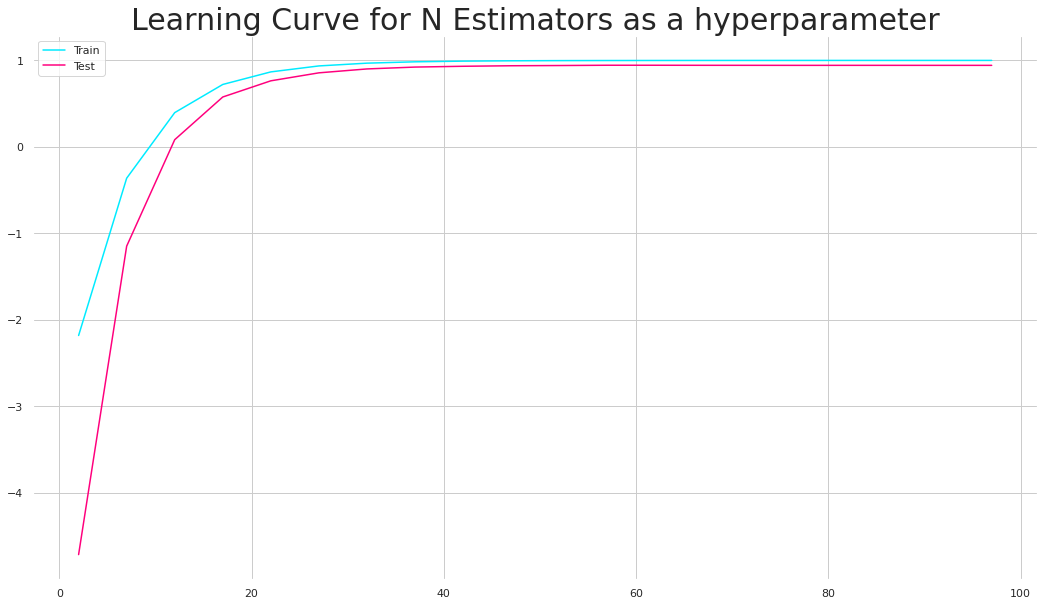

In [22]:
plt.plot(values,train_scores,color=blue,label='Train');
plt.plot(values,test_scores,color=red,label='Test');
plt.title('Learning Curve for N Estimators as a hyperparameter',fontsize=30);
plt.legend();

In [25]:
xgb = XGBRegressor(gamma=0,learning_rate=0.094,max_depth=20,n_estimators=i,n_jobs=16)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_score(y_pred,y_test)

[17:11:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9468413647801669

In [27]:
np.array(y_test)

array([ 76000., 149000.,  69000.,  99000.,  90000.,  83000.,  46000.,
        83000.,  35000.,  70000.,  98000., 140000.,  46000.,  93000.,
        96000.,  93000., 120000.,  60000.,  72000.,  46000., 114000.,
        75000.,  96000.,  51000.,  49000.,  39000.])

In [28]:
y_pred

array([ 71441.57 , 148228.97 ,  69317.14 ,  95293.43 ,  75854.07 ,
        83613.06 ,  48796.715,  83613.06 ,  37310.914,  71614.92 ,
        98880.89 , 148939.86 ,  46355.508,  91823.65 ,  94050.805,
        87477.914, 139453.53 ,  79334.8  ,  65702.88 ,  46847.48 ,
       116192.15 ,  69646.375,  99741.58 ,  59616.93 ,  49106.688,
        40244.844], dtype=float32)

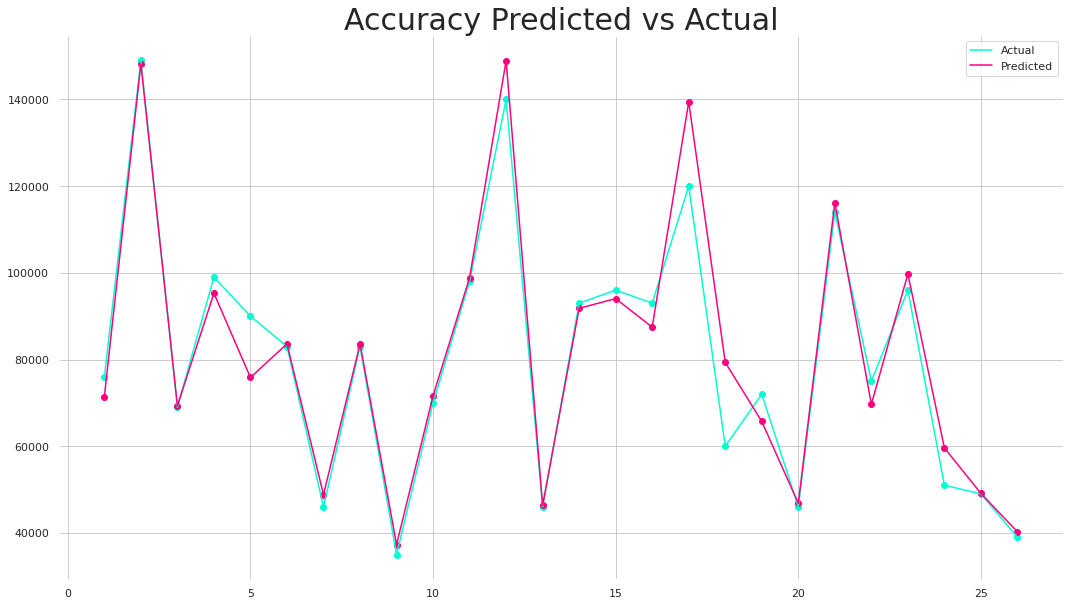

In [29]:
x_axis = [i for i in range(1,27)]
plt.plot(x_axis,y_test,color=cyan,label='Actual')
plt.scatter(x_axis,y_test,color=cyan)
plt.plot(x_axis,y_pred,color=red,label='Predicted')
plt.scatter(x_axis,y_pred,color=red)
plt.title('Accuracy Predicted vs Actual',fontsize=30)
#ax.set_facecolor('white')
plt.legend();
plt.savefig('fig.png')